## Setup for R

In [1]:
library(glue)
library(latex2exp)
library(readxl)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks glue::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()


In [2]:
get_sheet <- function(sheetname) {
    read_excel('./PS3-data.xlsx', sheet=sheetname)
} 

## Question 1

### 1a

$H_0$: Accuracy of new method $\leq$ Accuracy of old method ($ \leq 80\%$)

$H_A$: Accuracy of new method > Accuracy of old method ($> 80\%$)

### 1b

Modelling with Bernoulli trials of $p = 0.8$ 

Binomial approx to normal for number of people accurately assessed in sample size of 50:
$$X \sim \mathcal{N}(40, 8)$$

In [3]:
z <- (46-40) / (8/50^0.5)
print( glue('z-value: {z}') )

z-value: 5.30330085889911


\begin{align}
\mathbb{P}(X > 46) & = \mathbb{P}(X > z) \\
& = 1 - \mathbb{P}(X \leq 5.3033)
\end{align}

In [4]:
prob <- 1 - pnorm(z)
print( glue('Probability is {prob}') )

Probability is 5.68636282505253e-08


As the probability $< \alpha$, we reject the null hypothesis. We conclude that the new method is better, although we cannot conclude how much better

## 1c

Power is $\mathbb{P}($reject $H_0$ | $H_1$ true)

In this case, power is $\mathbb{P}$

## Question 2

### 2a

In [33]:
data_q2 <- get_sheet('Q2 (digits of pi)')

In [34]:
digits_total <- sum(data_q2$Occurrences)
rand_exp_occ <- digits_total / 16

print( glue('If random, we expect {rand_exp_occ} occurences per digit (assumption of uniformity)') )

If random, we expect 6.25e+10 occurences per digit (assumption of uniformity)


In [35]:
test_stat <- data_q2 %>%
    mutate(indiv_var = (Occurrences - rand_exp_occ)^2 / rand_exp_occ) %>%
    select(indiv_var) %>%
    sum()

print( glue('Test stat: {test_stat}') )

Test stat: 7.94433456784


In [36]:
p <- pchisq(test_stat, 15, lower.tail=F)

print( glue('p-value is {p}') )

p-value is 0.925994983534935


As $p$, the probability of seeing a value at least as extreme should $H_0$ be true, is $> \alpha$, we fail (very hard, in this case) to reject the null hypothesis. It still seems random. 

### 2b

$$\dot{1}23456789\dot{0}$$

Clearly, this will provide exactly the expected number of occurrences per digit as if it were random and uniformly distributed (so long as we take multiples of 10 consecutive digits in our sample). But it's repeated. Pretty cool.

## Question 3

## 3a

$r$ is the same.

\begin{align}
r & = \frac{s_{xy}}{s_x s_y} \\
& = \frac{s_{yx}}{s_y s_x}
\end{align}

### 3b

No, $\beta_1$ is not just flipped in the $y=x$ line. 

*Intuitive Argument*
In linear regression, we're minimizing the mean square error, which is the squared distance between each point $y_i$ and the predicted point $\hat{y}_i$. If we minimize $x_i$'s error with $\hat{x}_i$, that's totally different and how the line changes depends on the relationship between $y$ and $x$.

*(hopefully) More rigorous argument*

\begin{align}
\beta_1 & = \frac{s_{xy}}{s^2_x} \\
\text{By swapping $x$ and $y$...} \\
\beta_{1, swapped} & = \frac{s_{xy}}{s^2_y} \\
\end{align}

We note that $s_y$ is not $s_x$ reflected in $y=x$, therefore something else happens.

Graphically demonstrated below, where blue is $y$ against $x$ and orange is $x$ against $y$. The black line is $y=x$.

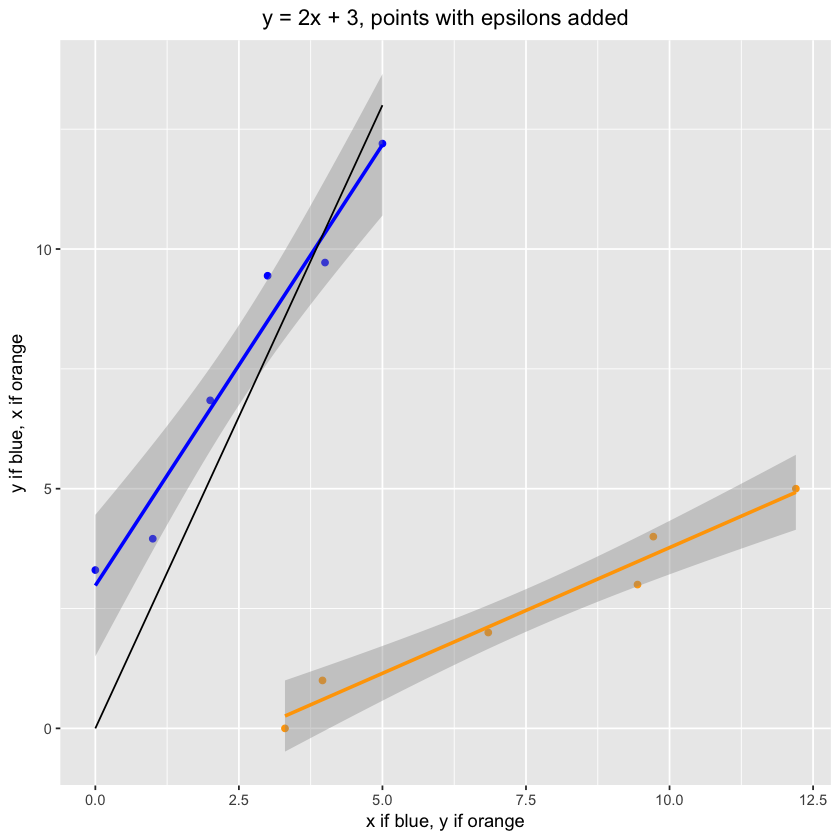

In [61]:
n <- 5

make_noise <- function(v) rnorm( length(v) )

sample <- tibble(x=0:n)  %>%
    mutate(y = 2*x + 3 + make_noise(x)) 
y_x <- tibble(x=c(0,n), y=c(0,2*n+3))

ggplot(sample) +
    # PLOT Y AGAINST X
    geom_point(aes(x, y), color='blue') +
    geom_smooth(
        aes(x, y),
        color='blue',
        method='lm'
    ) +
    # PLOT X AGAINST Y
    geom_point(color='orange', aes(y,x)) +
    geom_smooth(
        aes(y,x),
        color='orange',
        method='lm'
    ) +
    # PLOT Y=X
    geom_line(data=y_x, aes(x,y)) +
    # LABELS
    ggtitle('y = 2x + 3, points with epsilons added') +
    xlab('x if blue, y if orange') + 
    ylab('y if blue, x if orange') + 
    theme(plot.title = element_text(hjust=0.5))

## Question 4

### 4a

In [12]:
data_q4 <- get_sheet('Q4 (triple jump)') %>%
    rename(dist = 'winning distance (Olympic triple jump, women)')

year,dist
1996,15.33
2000,15.20
2004,15.30
2008,15.39
2012,14.98
2016,15.17


If $H_0$ is true,
$$ p = \beta_1 = 0$$

In [20]:
aug <- data_q4 %>%
    mutate(
        x_res = year - mean(year),
        y_res = dist - mean(dist),
        prod = x_res * y_res,
        sq = x_res^2
    )

ssp <- sum(aug$prod)
ss <- sum(aug$sq)

beta1 <- ssp/ss
beta0 <- mean(data_q4$dist) - beta1 * mean(data_q4$year)

print( glue('beta1 hat = {beta1}') )
print( glue('beta0 hat = {beta0}') )

beta1 hat = -0.00978571428571427
beta0 hat = 34.8584761904762


### 4b

In [21]:
winning_dist <- beta0 + 2020*beta1
winning_dist

[1] 15.09133

In [57]:
model <- lm(dist ~ year, data_q4)
pred_inp <- tibble(year=2020)

predict(
    model, 
    pred_inp,
    interval='prediction',
    level=0.99
)

,fit,lwr,upr
1,15.09133,14.19802,15.98465


### 4c

In [58]:
predict(
    model, 
    pred_inp,
    interval='confidence',
    level=0.99
)

,fit,lwr,upr
1,15.09133,14.48264,15.70003


### 4d

The prediction interval is higher. This makes sense - it's a prediction of a single value, so the variance must be higher.

The confidence interval is about an aggregated value, so the variance is lower.

## Question 5

### 5a

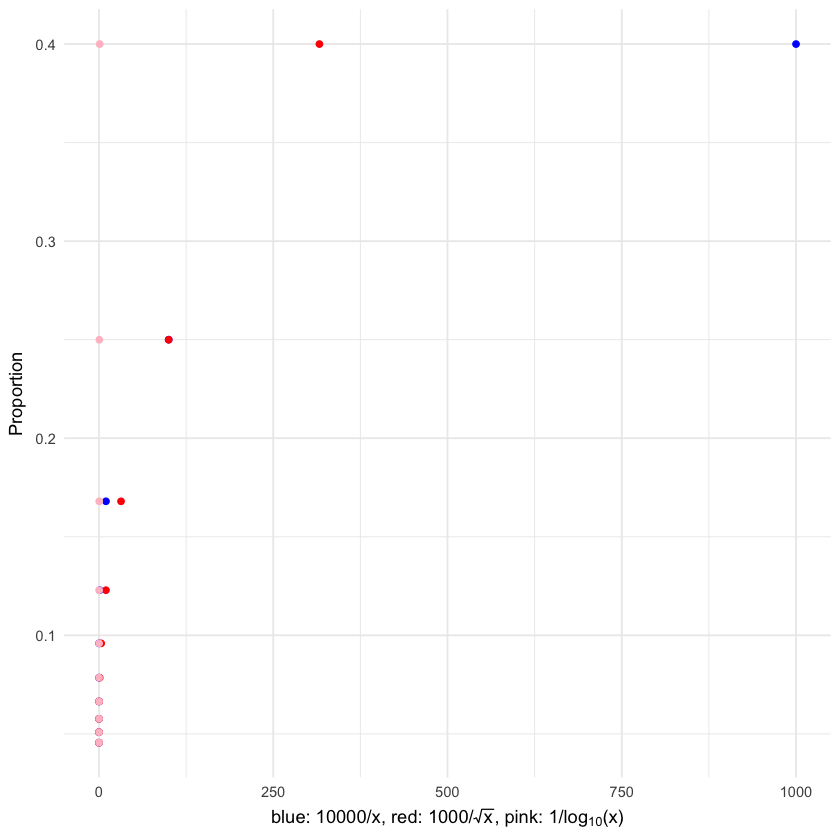

In [59]:
data_q5 <- get_sheet('Q5 (primes)') %>%
    mutate(
        x = 10^( as.numeric(substring(x, 4)) ),
        x1 = 10000/x,
        x2 = 1000/sqrt(x),
        x3 = 1/log(x,10)
    ) 

ggplot(data_q5, aes(y=Proportion)) +
    geom_point(aes(x=x1), color='blue') +
    geom_point(aes(x=x2), color='red') +
    geom_point(aes(x=x3), color='pink') +
    xlab( TeX('blue: 10000/x, red: 1000/\\sqrt{x}, pink: 1/log_{10}(x)') ) +
    theme_minimal()

The pink dots, representing $p(x)$ against $1/log_{10}(x)$, appears the most linear

### 5b


Call:
lm(formula = Proportion ~ x3, data = data_q5)

Coefficients:
(Intercept)           x3  
    0.01519      0.40419  



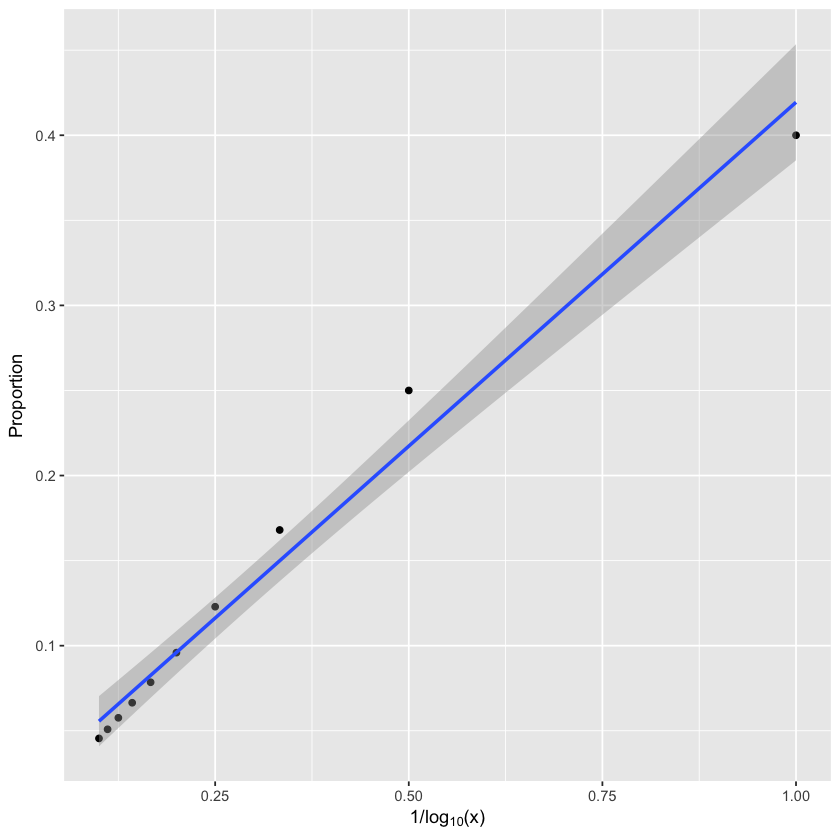

In [54]:
model <- lm(Proportion ~ x3, data_q5)

ggplot(data_q5, aes(x3, Proportion)) +
    geom_point() +
    geom_smooth(method='lm') +
    xlab( TeX('1/log_{10}(x)') )

print(model)

At $0.40419$, it's pretty close.

## Question 6

In [121]:
data_q6 <- get_sheet('Q6 (vaccine)')

In [122]:
test_stat = 

X__1,Vaccine,Placebo,total
Polio,57,142,199
No polio,200688,201087,401775
total,200745,201229,401974


## Question 7

### 7a

\begin{align}
RHS: \frac{\hat{\beta}_1}{s/(s_x\sqrt{n-1})} & = \frac{1}{s} \frac{s_{xy}}{s_x^2} s_x\sqrt{n-1} \\
& = \frac{1}{s} \frac{s_{xy}}{s_x} \sqrt{n-1} \\
LHS: \frac{r\sqrt{n-2}}{\sqrt{SSE/SST}} & = \frac{s_{xy}}{s_x s_y}\sqrt{\frac{n-2}{SSE}}\sqrt{SST} \\
& = \frac{s_{xy}}{s_x} \frac{1}{s_y} \frac{1}{s} \sqrt{SST} \\
& = \frac{1}{s} \frac{s_{xy}}{s_x} \frac{1}{\sqrt{SST}} \sqrt{SST} \\
& = RHS
\end{align}

## Question 8

## 8a

| scatter | $\beta_0$ | $\beta_1$ | $\beta_2$ | $\beta_3$ | 
| :---: | :---: | :---: | :---: | :---: |
| a | + | + | + | 0 |
| b | + | + | + | + |
| c | + | + | 0 | + |
| d | + | - | - | + |

## 8b
\begin{align}
y_A & = \hat{\beta}_0 + \hat{\beta}_1 x + \varepsilon \\
y_B & = \hat{\beta}_0 + \hat{\beta}_1 x + \hat{\beta}_2 + \hat{\beta}_3 x + \varepsilon
\end{align}

## Question 9

In [5]:
data_q9 <- get_sheet('Q9 (child)')

## 9a

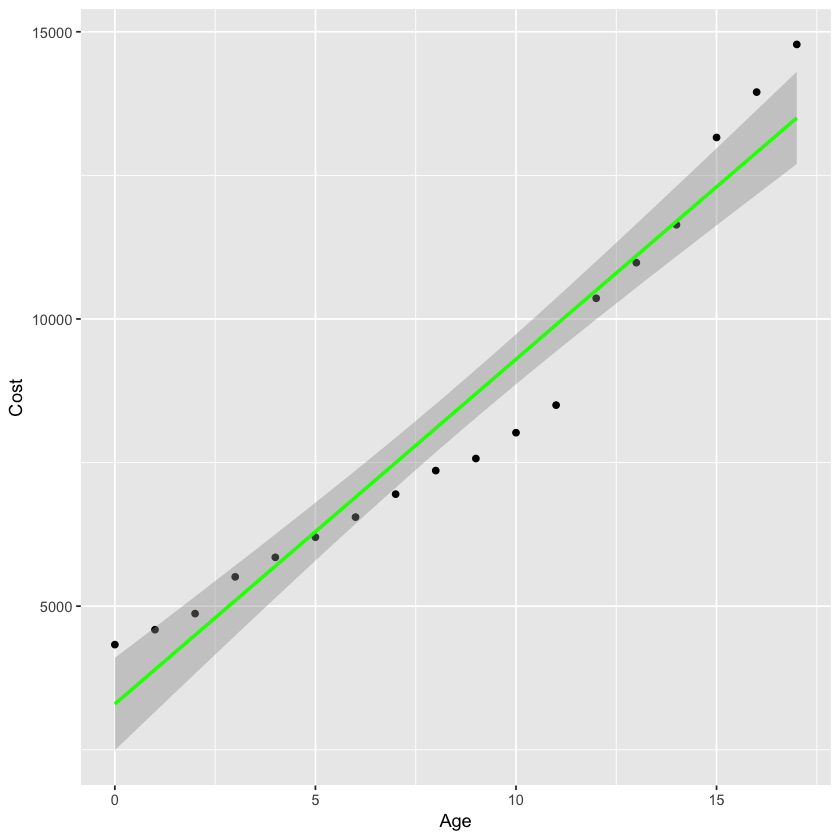

In [6]:
ggplot(data_q9, aes(Age, Cost)) +
    geom_point() +
    geom_smooth(color='green', method='lm') 

Unless you go to a high-degree polynomial, it's best described by a line 

## 9b

In [7]:
line <- lm(Cost ~ Age, data_q9)

In [8]:
summary(line)


Call:
lm(formula = Cost ~ Age, data = data_q9)

Residuals:
     Min       1Q   Median       3Q      Max 
-1399.13  -497.77   -78.65   623.91  1278.95 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3295.61     379.20   8.691 1.86e-07 ***
Age           600.32      38.08  15.765 3.62e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 838.2 on 16 degrees of freedom
Multiple R-squared:  0.9395,	Adjusted R-squared:  0.9357 
F-statistic: 248.5 on 1 and 16 DF,  p-value: 3.615e-11


$r^2 = 0.9395$, $r^2_{adj} = 0.9357$